<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for i in range(len(X)):
        result += X[i] @ V[i]
    return result

def test_sum_prod():
    X1 = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V1 = [np.array([[1], [2]]), np.array([[3], [4]])]
    result1 = sum_prod(X1, V1)
    expected1 = np.array([[1*1+2*2 + 5*3+6*4], [3*1+4*2 + 7*3+8*4]])
    assert np.allclose(result1, expected1)

    X2 = [np.array([[1, 0], [0, 1]])]
    V2 = [np.array([[2], [3]])]
    result2 = sum_prod(X2, V2)
    expected2 = np.array([[2], [3]])
    assert np.allclose(result2, expected2)

    X3 = [np.array([[2, 0], [0, 2]])]
    V3 = [np.array([[1], [1]])]
    result3 = sum_prod(X3, V3)
    expected3 = np.array([[2], [2]])
    assert np.allclose(result3, expected3)

    print("test_sum_prod passed")

test_sum_prod()

test_sum_prod passed


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
    result1 = binarize(M1, 0.5)
    expected1 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result1, expected1)

    M2 = np.array([[0.3, 0.7], [0.5, 0.2]])
    result2 = binarize(M2, 0.5)
    expected2 = np.array([[0, 1], [0, 0]])
    assert np.array_equal(result2, expected2)

    M3 = np.array([[1.0, 0.0], [0.5, 0.6]])
    result3 = binarize(M3, 0.5)
    expected3 = np.array([[1, 0], [0, 1]])
    assert np.array_equal(result3, expected3)

    print("test_binarize passed")

test_binarize()

test_binarize passed


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test_unique():
    mat1 = np.array([[1, 2, 1], [3, 3, 4], [1, 2, 3]])
    rows1 = unique_rows(mat1)
    cols1 = unique_columns(mat1)
    assert len(rows1) == 3 and len(cols1) == 3

    mat2 = np.array([[1, 1, 1], [2, 2, 2]])
    rows2 = unique_rows(mat2)
    assert np.array_equal(rows2[0], [1])
    assert np.array_equal(rows2[1], [2])

    mat3 = np.array([[5, 3, 5], [1, 2, 1], [4, 4, 4]])
    rows3 = unique_rows(mat3)
    assert np.array_equal(rows3[2], [4])

    print("test_unique passed")

test_unique()

test_unique passed


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

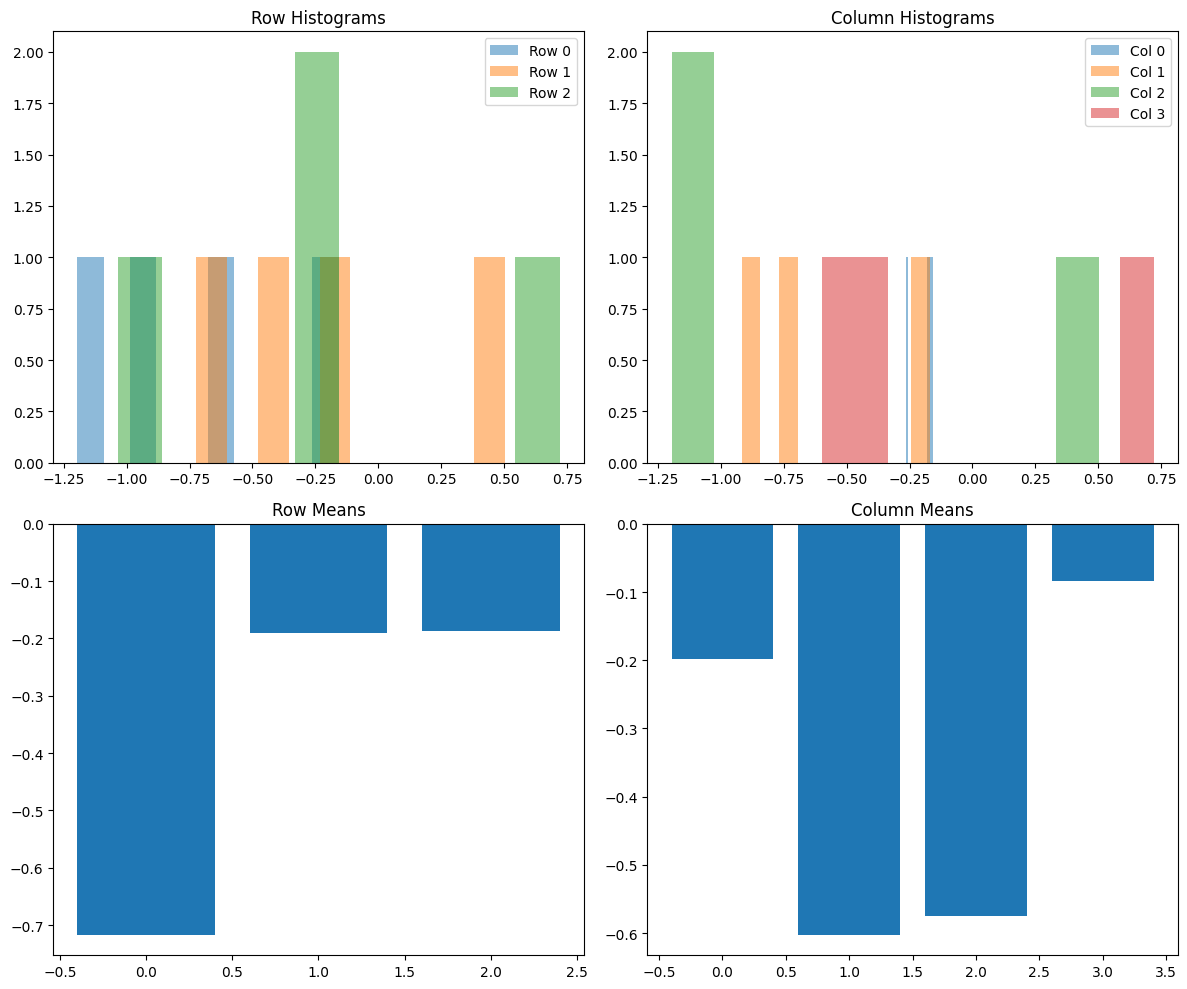

(array([[-0.15814381, -0.91699395, -1.19492585, -0.59756418],
        [-0.16940773, -0.72276658,  0.50098591, -0.37217496],
        [-0.26484641, -0.16752837, -1.03251222,  0.71911199]]),
 array([-0.71690695, -0.19084084, -0.18644376]),
 array([0.14874896, 0.19872767, 0.38559196]),
 array([-0.19746598, -0.60242964, -0.57548406, -0.08354238]),
 array([0.00229121, 0.10085693, 0.58379016, 0.33059374]))

In [10]:
def analyze_matrix(m, n):
    mat = np.random.normal(0, 1, (m, n))

    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for i in range(m):
        axes[0, 0].hist(mat[i, :], alpha=0.5, label=f'Row {i}')
    axes[0, 0].set_title('Row Histograms')
    axes[0, 0].legend()

    for j in range(n):
        axes[0, 1].hist(mat[:, j], alpha=0.5, label=f'Col {j}')
    axes[0, 1].set_title('Column Histograms')
    axes[0, 1].legend()

    axes[1, 0].bar(range(m), row_means)
    axes[1, 0].set_title('Row Means')

    axes[1, 1].bar(range(n), col_means)
    axes[1, 1].set_title('Column Means')

    plt.tight_layout()
    plt.show()

    return mat, row_means, row_vars, col_means, col_vars

analyze_matrix(3, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [12]:
def chess(m, n, a, b):
    mat = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    return mat

def test_chess():
    result1 = chess(2, 3, 1, 0)
    expected1 = np.array([[1, 0, 1], [0, 1, 0]])
    assert np.array_equal(result1, expected1)

    result2 = chess(3, 3, 5, 10)
    expected2 = np.array([[5, 10, 5], [10, 5, 10], [5, 10, 5]])
    assert np.array_equal(result2, expected2)

    result3 = chess(1, 4, 7, 8)
    expected3 = np.array([[7, 8, 7, 8]])
    assert np.array_equal(result3, expected3)

    print("test_chess passed")

test_chess()

test_chess passed


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [13]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color)
    start_i = (m - a) // 2
    start_j = (n - b) // 2
    image[start_i:start_i+a, start_j:start_j+b] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color)
    center_i, center_j = m // 2, n // 2
    for i in range(m):
        for j in range(n):
            if ((i - center_i) / a) ** 2 + ((j - center_j) / b) ** 2 <= 1:
                image[i, j] = ellipse_color
    return image

def test_draw():
    rect1 = draw_rectangle(4, 6, 10, 10, [1, 0, 0], [0, 0, 0])
    assert rect1.shape == (10, 10, 3)

    rect2 = draw_rectangle(2, 2, 5, 5, [0, 1, 0], [1, 1, 1])
    assert rect2.shape == (5, 5, 3)

    ellipse1 = draw_ellipse(4, 6, 10, 10, [0, 1, 0], [0, 0, 0])
    assert ellipse1.shape == (10, 10, 3)

    print("test_draw passed")

test_draw()

test_draw passed


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [14]:
def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)

    local_max = []
    local_min = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_max.append(i)
        if series[i] < series[i-1] and series[i] < series[i+1]:
            local_min.append(i)

    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

    return mean, variance, std, local_max, local_min, moving_avg

def test_time_series():
    series1 = np.array([1, 3, 7, 1, 2, 6, 0, 1])
    mean1, var1, std1, maxs1, mins1, mov_avg1 = analyze_time_series(series1, 3)
    assert len(mov_avg1) == len(series1) - 3 + 1

    series2 = np.array([5, 2, 8, 3, 9, 1])
    mean2, var2, std2, maxs2, mins2, mov_avg2 = analyze_time_series(series2, 2)
    assert len(mov_avg2) == len(series2) - 2 + 1

    series3 = np.array([1, 2, 3, 4, 5])
    mean3, var3, std3, maxs3, mins3, mov_avg3 = analyze_time_series(series3, 4)
    assert len(mov_avg3) == len(series3) - 4 + 1

    print("test_time_series passed")

test_time_series()

test_time_series passed


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [18]:
def one_hot_encoding(labels):
    n_classes = np.max(labels) + 1
    encoding = np.zeros((len(labels), n_classes))
    for i, label in enumerate(labels):
        encoding[i, label] = 1
    return encoding

def test_one_hot():
    labels1 = [0, 2, 3, 0]
    result1 = one_hot_encoding(labels1)
    expected1 = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
    assert np.array_equal(result1, expected1)

    labels2 = [1, 1, 1]
    result2 = one_hot_encoding(labels2)
    expected2 = np.array([[0, 1], [0, 1], [0, 1]])
    assert np.array_equal(result2, expected2)

    labels3 = [0, 1, 2, 0, 1]
    result3 = one_hot_encoding(labels3)
    expected3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])
    assert np.array_equal(result3, expected3)

    print("test_one_hot passed")

test_one_hot()

test_one_hot passed
